In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 10.10990186,  -5.10947426],
       [  4.74247162,  -5.5262056 ],
       [ 11.22659242,  -6.75803879],
       ...,
       [  6.41756939,  -5.70423246],
       [ 10.46088536, -10.78291022],
       [  7.81929449,  -6.12299685]])

In [4]:
y

array([1, 2, 1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0,
       1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 1,
       1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0,
       1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0,
       2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 2,
       1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0,
       1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1,
       2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1,
       2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 1,
       1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0,
       1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2,
       0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 0, 0,

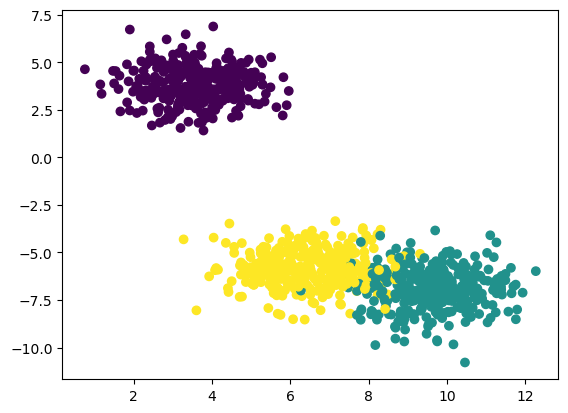

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Shashank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shashank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Shashank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shashank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

In [12]:
wcss

[1339.9999999999993,
 288.52965565978155,
 113.55948483881218,
 89.00374441191686,
 69.87457602006234,
 57.23468170186094,
 51.37835296839596,
 45.99692972622718,
 40.845848881523054,
 37.21759347346239]

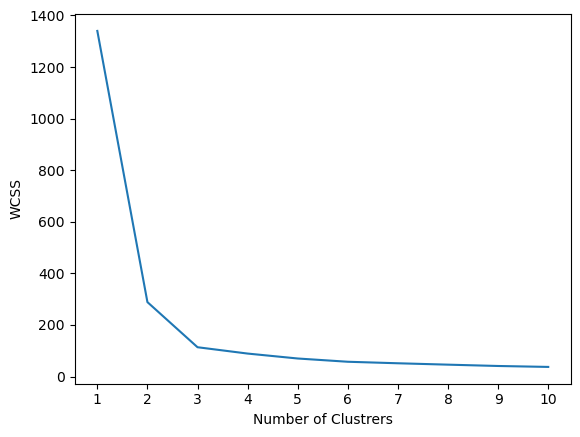

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)

C:\Users\Shashank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shashank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2,
       2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2, 0, 1, 1,
       1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1,
       1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0,
       2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0,
       2, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0,
       1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1,
       1, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1,
       1, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2,
       1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1,
       1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 2,
       2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2,
       2, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0,

In [16]:
y_pred=kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1,
       0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0,
       1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 1,
       1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 2,
       1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0,
       2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1,
       2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1,
       1, 1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1,
       0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1,
       0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 1,

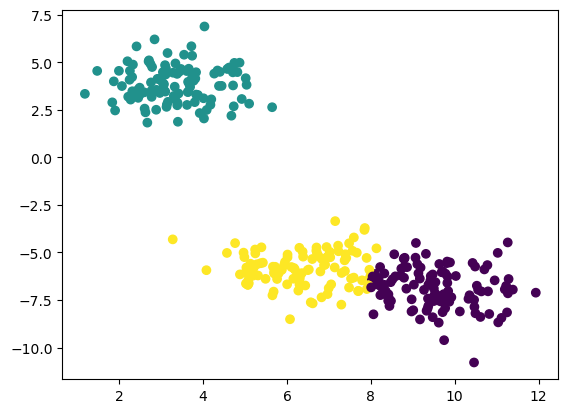

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [19]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [20]:
## kneelocator
!pip install kneed

In [21]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [23]:
kl.elbow

3

In [24]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [25]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\Shashank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shashank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Shashank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shashank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

In [26]:
silhouette_coefficients

[0.7070612076508861,
 0.643030632462808,
 0.5515449281090783,
 0.4351045277228326,
 0.389485049182581,
 0.36541880086640605,
 0.3384889563069972,
 0.3447163212570701,
 0.3489126667752284]

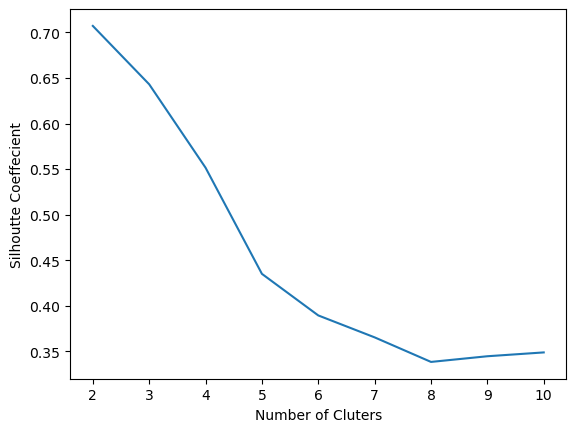

In [27]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()